In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

## Task 1 - Build a highly predictive classification model

In [2]:
#Secure reproducibility
np.random.seed(2021)


onlineShoppersDf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')
print("Shape : {}".format(onlineShoppersDf.shape))
onlineShoppersDf.head(5)

Shape : (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Good to know if the data is balanced.Being e-commerce data we can expected that not

In [3]:
print(onlineShoppersDf[onlineShoppersDf["Revenue"] == True].shape[0])
print(onlineShoppersDf[onlineShoppersDf["Revenue"] == False].shape[0])

1908
10422


In [4]:
#Check nulls
onlineShoppersDf.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
onlineShoppersDf.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


C:\Users\foo\anaconda3\envs\FourthBrain_latest\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\foo\anaconda3\envs\FourthBrain_latest\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\foo\anaconda3\envs\FourthBrain_latest\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\foo\anaconda3\envs\FourthBrain_latest\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\foo\anaconda3\envs\FourthBrain_latest\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


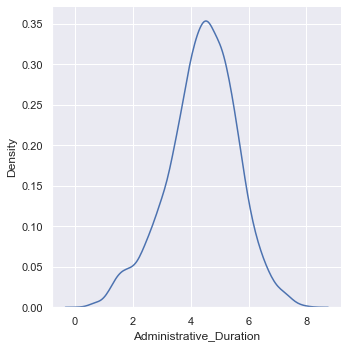

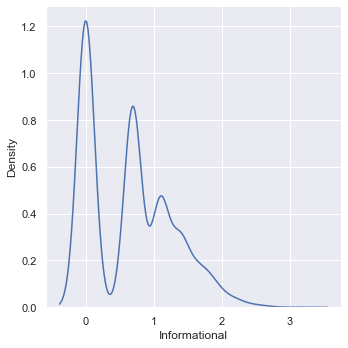

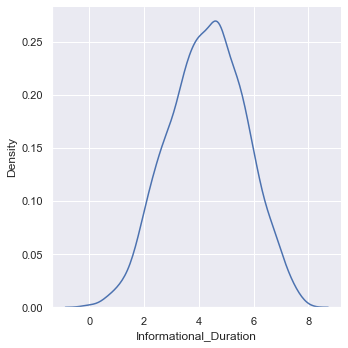

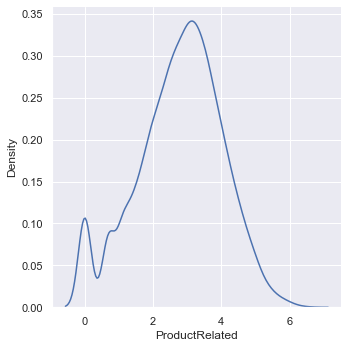

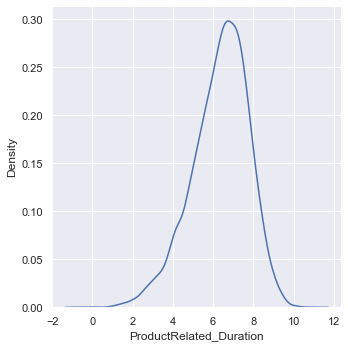

In [6]:
%matplotlib inline
sns.set()
for pageTypeColName in onlineShoppersDf.iloc[:,1:6].columns:
  #Page type has the data so much tailored to the left so logarithmic transform is good transformation
  #sns.displot(np.log(onlineShoppersDf.iloc[:,1:5]), x=pageTypeColName, kind="kde",)
  sns.displot(np.log(onlineShoppersDf[pageTypeColName]), kind="kde",)


the informational page type has the lowest spent time and have the most variability while the other types are near to a normal distribution

<AxesSubplot:xlabel='Month'>

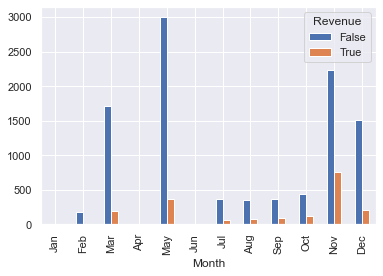

In [7]:
#Revenue per month
shoppersPlotCopy=onlineShoppersDf.copy()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
shoppersPlotCopy['Month'] =pd.Categorical(shoppersPlotCopy['Month'], categories=months, ordered=True)
shoppersPlotCopy.pivot_table(index=['Month'],columns='Revenue',aggfunc='size').plot(kind='bar')

March,May ,November and December seems the months with more activity and more revenue too.


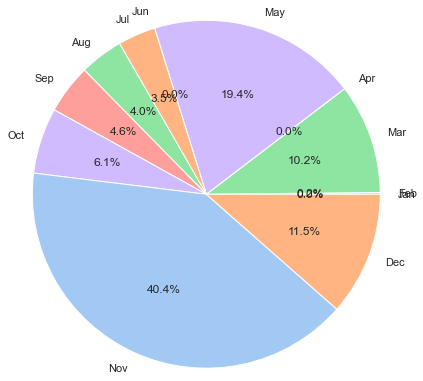

In [8]:
revenueData=shoppersPlotCopy[onlineShoppersDf["Revenue"] == True]
revenueMonthsCount =revenueData.groupby("Month").size().reset_index(name="Percentage")

revenueMonthsCount["Percentage"]= np.round((revenueMonthsCount["Percentage"]/revenueData.shape[0])*100,2)
colors = sns.color_palette('pastel')[0:5]
# #create pie chart
plt.pie(revenueMonthsCount["Percentage"],labels= revenueMonthsCount["Month"], colors = colors, autopct='%.1f%%',radius=2)
plt.show()

The four months with better revenue are November,May,March and December

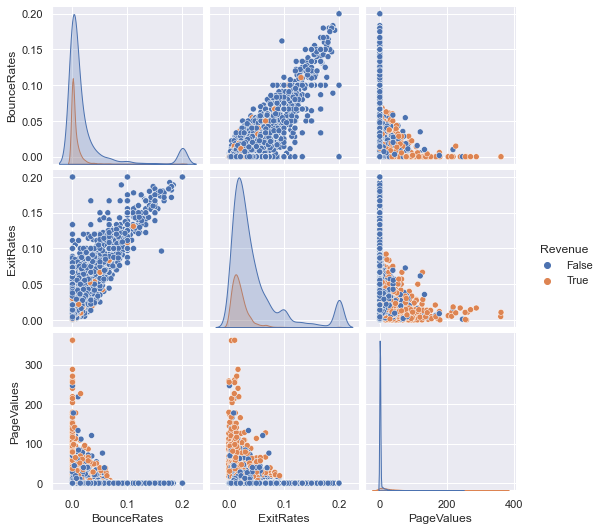

In [9]:
sns.pairplot(shoppersPlotCopy[["BounceRates","ExitRates","PageValues","Revenue"]], hue="Revenue")

The data with revenue have low BoucenRates and high PageValues,the same with ExitRates



## Data preparation

In [10]:
# Map the binary columns
for label,content in onlineShoppersDf[["Revenue","Weekend"]].items():
    # Apply the mapping to the current column with the map() method for Pandas Series
    onlineShoppersDf[label] = content.map({ True : 1 , False : 0})

monthMapping = {'May' : 5, 'June' : 6, 'Jul' : 7, 'Aug' : 8, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12, 'Jan' : 1, 'Feb' : 2,
       'Mar' : 3, 'Apr' : 4, 'Sep' : 9}
# # Map the months
onlineShoppersDf['Month'] = onlineShoppersDf['Month'].map(monthMapping)

In [11]:
#For VisitorType hot-encoding is better than mapping
categorical_columns = onlineShoppersDf.select_dtypes("object").columns
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
onlineShoppersDf = pd.get_dummies(onlineShoppersDf)

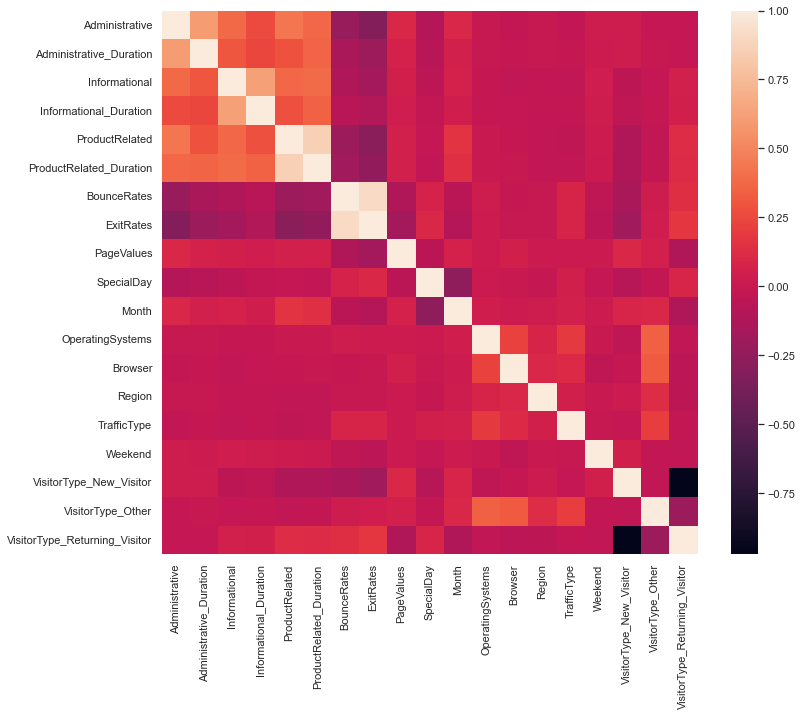

In [12]:
#Extract target feature before dropping correlated features
y = onlineShoppersDf.pop("Revenue")

plt.figure(figsize=(12,10))
# Now its the moment to delete correlated features that doest give us more information but can penalize the model training time
corr = onlineShoppersDf.corr(method="pearson")
sns.heatmap(corr)
plt.show()

In [13]:
columnsKeeped = np.full((corr.shape[0],), True, dtype=bool)
#If the correlation is greater equal than the treshold the feature is removed
threshold = 0.9
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= threshold:
            if columnsKeeped[j]:
                columnsKeeped[j] = False
selected_columns = onlineShoppersDf.columns[columnsKeeped]
onlineShoppersReducedDf = onlineShoppersDf[selected_columns].copy()

In [14]:
onlineShoppersDf.head(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1


Once we have the reduced dataset, its time to split the data in train and test datasets.
At same time the data is normalize.This is to help us with the training convergence and have better predictions because the data have too much variance in some columns

In [15]:
trans = StandardScaler()
# #Columns to normalize

normalizedFeaturesColumnNames=["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates"]
normalizedFeatures=onlineShoppersReducedDf[normalizedFeaturesColumnNames].copy()
normalizedData = trans.fit_transform(normalizedFeatures)
onlineShoppersReducedDf[normalizedFeaturesColumnNames]=normalizedData

In [16]:
#We put the target feature again for the next data split
onlineShoppersReducedDf["Target"]=y
onlineShoppersReducedDf.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Target
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,0.0,0.0,2,1,1,1,1,0,0,0,1,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,0.0,0.0,2,2,2,1,2,0,0,0,1,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,0.0,0.0,2,4,1,9,3,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,0.0,0.0,2,3,2,2,4,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.0,0.0,2,3,3,1,4,1,0,0,1,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757,-0.132035,0.0,0.0,2,2,2,1,3,0,0,0,1,0
6,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,0.0,0.4,2,2,4,3,3,0,0,0,1,0
7,-0.395938,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,3.667189,0.0,0.0,2,1,2,1,5,1,0,0,1,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.605012,-0.457683,0.0,0.8,2,2,2,2,3,0,0,0,1,0
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.238685,-0.457683,0.0,0.4,2,2,4,1,2,0,0,0,1,0


In [17]:
trainMonths=[6,7,8,9,9,10,12]
testMonths=[2,3,4]
#June-Dec, and test the model on data entries corresponding to Feb-March
trainingDf = onlineShoppersReducedDf[onlineShoppersReducedDf['Month'].isin(trainMonths)]
testDf = onlineShoppersReducedDf[onlineShoppersReducedDf['Month'].isin(testMonths)]

y_train=trainingDf.pop("Target")
X_train=trainingDf.to_numpy()

y_test=testDf.pop("Target")
X_test=testDf.to_numpy()


In [18]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.0,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000
mean,0.109730,0.055294,0.015163,0.018815,0.007331,-0.014997,-0.056496,6.513778,0.0,9.920557,2.165592,2.469693,3.324994,3.918494,0.220015,0.186484,0.016250,0.797266
std,1.044120,1.036827,1.004356,1.112737,0.997497,1.082678,0.903897,20.274830,0.0,2.128456,1.054462,2.077304,2.491498,4.308781,0.414310,0.389547,0.126451,0.402088
min,-0.696993,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,-0.457683,0.000000,0.0,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.521400,-0.457683,0.000000,0.0,8.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.395938,-0.294270,-0.396478,-0.244931,-0.286270,-0.315424,-0.403408,0.000000,0.0,10.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,0.507228,0.162817,-0.396478,-0.244931,0.140949,0.100607,-0.127693,0.000000,0.0,12.000000,3.000000,2.000000,5.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,6.528333,18.769559,9.838897,17.868683,14.711358,32.806777,3.667189,360.953384,0.0,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
logisticRegressionModel = LogisticRegression(random_state=0, class_weight='balanced',solver="liblinear",max_iter=150,penalty="l1").fit(X_train, y_train)
logisticModelPrediction = logisticRegressionModel.predict(X_test)

Model evaluation

Accuracy = 0.729794356767097, Precision = 0.2559366754617414, Recall = 0.9948717948717949, F1-score = 0.4071353620146905


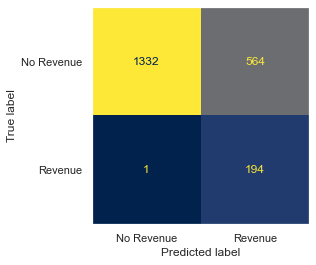

In [20]:
def printMetrics(testTarget,modelPrediction):
    confMatrix = confusion_matrix(testTarget, modelPrediction)
    acc   = accuracy(testTarget, modelPrediction)
    rec   = recall(testTarget, modelPrediction)
    prec  = precision(testTarget, modelPrediction)
    f1    = f1_score(testTarget, modelPrediction)
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

printMetrics(y_test,logisticModelPrediction)
plot_confusion_matrix(logisticRegressionModel,X_test,y_test, display_labels=['No Revenue', 'Revenue'],cmap="cividis",colorbar=False)
plt.grid(False)

We have a good accuracy that its mean the model is good making predictions of true positives in the whole data but it have a really bad precision so there are so much missclasifications where the model clasify with Revenue where the real class was No Revenue.
564 false positive drop our F1-Score under a fair coin probability

Accuracy = 0.9497847919655668, Precision = 0.65, Recall = 1.0, F1-score = 0.787878787878788


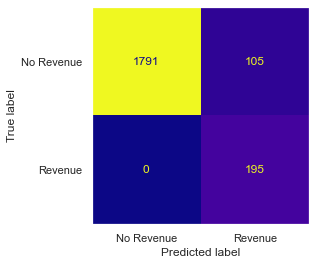

In [21]:
randomForestModel = RandomForestClassifier(max_depth=2, random_state=0,class_weight="balanced")
randomForestModel.fit(X_train, y_train)
randomForestPrediction=randomForestModel.predict(X_test)

printMetrics(y_test,randomForestPrediction)
plot_confusion_matrix(randomForestModel,X_test,y_test, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)

RandomForest have better performance than LogisticRegression,now we gonna try take some performance points from hyperparameters tunning

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [5,10,20,25,35], 'max_features': [3,4,5,10, 10], 
 'max_depth': [10, 15,30,40,50], 'bootstrap': [True, False]}
]


randomForestEmptyModel = RandomForestClassifier(random_state=25,class_weight="balanced")
#GridSearchCV help us to finde the best hyperparameters testing every combination
grid_search_forest = GridSearchCV(randomForestEmptyModel, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)
randomForestBestHypers=grid_search_forest.best_params_
print(grid_search_forest.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 5, 'n_estimators': 25}


Accuracy = 0.9416547106647537, Precision = 0.8173913043478261, Recall = 0.48205128205128206, F1-score = 0.6064516129032258


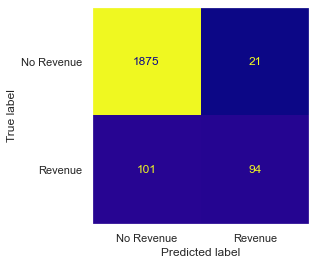

In [23]:
def createRandomForestModel(hyperParametersDict):
    bootstrap=hyperParametersDict['bootstrap']
    max_depth=hyperParametersDict['max_depth']
    max_features= hyperParametersDict['max_features']
    n_estimators= hyperParametersDict['n_estimators']
    return RandomForestClassifier(max_depth=max_depth,max_features=max_features,n_estimators=n_estimators,bootstrap=bootstrap,class_weight="balanced")


randomForestModel = createRandomForestModel(randomForestBestHypers)
randomForestModel.fit(X_train, y_train)


randomForestPrediction=randomForestModel.predict(X_test)
printMetrics(y_test,randomForestPrediction)
plot_confusion_matrix(randomForestModel,X_test,y_test, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)

With hyper-parameter tuning our F1 is worst but we have better precision,knowing that we prefer the last model because its better a secure revenue estimation than an overestimation

## Task 2 - Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

We will use k-means clustering for this

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [25]:
onlineShoppersClusteringDf=onlineShoppersDf.copy()
TARGET_NAME='Revenue'

In [26]:

#Now we scale the data to have the same "importance" of every features in the next PCA step
#Standard scaler over MinMaxScaler because we have values with high variability
standardScaler = StandardScaler()
# #Columns to normalize
normalizedFeaturesColumnNames=["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates",'ExitRates']
normalizedFeatures=onlineShoppersClusteringDf[normalizedFeaturesColumnNames].copy()
normalizedData = trans.fit_transform(normalizedFeatures)
onlineShoppersClusteringDf[normalizedFeaturesColumnNames]=normalizedData
print("Normalized data shape : {}".format(onlineShoppersClusteringDf.shape))

#Take PCA for the 85% explicability of the data
pca = PCA(n_components = 0.80)
pca.fit(normalizedData)
pcaReducedDf = pca.transform(normalizedData)

print("PCA reduced data shape : {}".format(pcaReducedDf.shape))

Normalized data shape : (12330, 19)
PCA reduced data shape : (12330, 4)


Now we should find the number of clusters hyperparameter

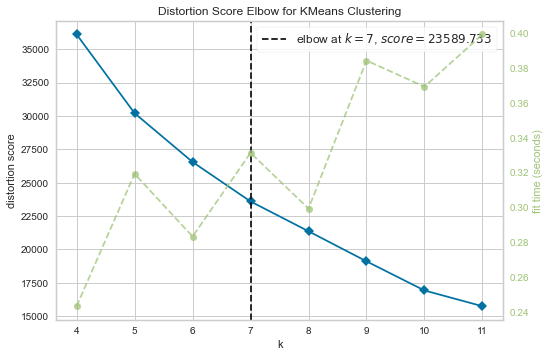

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kMeansModel = KMeans()
visualizer = KElbowVisualizer(kMeansModel, k=(4,12))
visualizer.fit(pcaReducedDf)
visualizer.show() 

Create the kmeans model with the selected clusters number

In [28]:
kmeansModel = KMeans(n_clusters=7, random_state=2021)
kmeansPrediction= kmeansModel.fit(pcaReducedDf)
clusterIds = kmeansPrediction.labels_
### END CODE HERE ###
print('The unique cluster ids are ', np.unique(clusterIds))

The unique cluster ids are  [0 1 2 3 4 5 6]


C:\Users\Alejandro\anaconda3\envs\FourthBrain_latest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


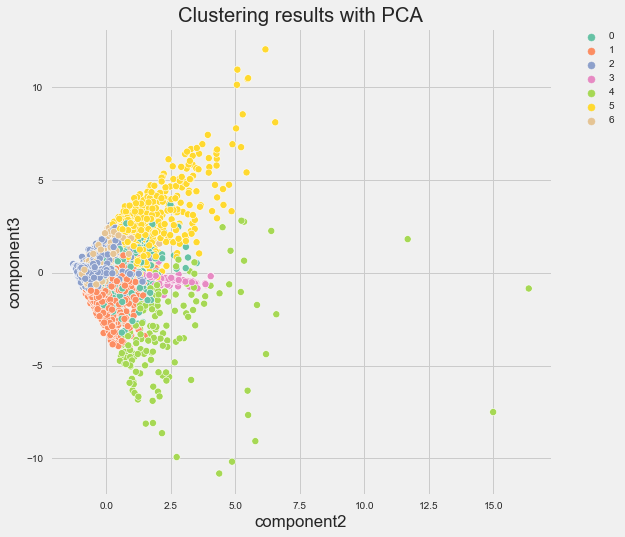

In [29]:
clusterVisualizationDf=pd.DataFrame(pcaReducedDf,columns=["component1", "component2","component3","component4"])
clusterVisualizationDf["ClusterId"]=clusterIds
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot("component2","component3",s=50,data=clusterVisualizationDf,hue="ClusterId",
palette="Set2")
scat.set_title("Clustering results with PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Most visible clusters are the 5(yellow) , 4(light green) ,1 (red) and 2(blue) and 3 (pink)

Put the cluster id corresponding to each example as a column in the dataframe and add again the target  with the intention to find group of good buyers

In [30]:
onlineShoppersClusteringDf['Revenue'] = y
onlineShoppersClusteringDf['ClusterID'] = clusterIds
onlineShoppersClusteringDf.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue,ClusterID
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,1,1,1,1,0,0,0,1,0,3
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,0.0,0.0,...,2,2,1,2,0,0,0,1,0,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,4,1,9,3,0,0,0,1,0,3
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,0.0,0.0,...,3,2,2,4,0,0,0,1,0,2
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,0.0,0.0,...,3,3,1,4,1,0,0,1,0,2
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757,-0.132035,-0.380935,0.0,0.0,...,2,2,1,3,0,0,0,1,0,2
6,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.4,...,2,4,3,3,0,0,0,1,0,3
7,-0.395938,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,3.667189,3.229316,0.0,0.0,...,1,2,1,5,1,0,0,1,0,3
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.605012,-0.457683,1.171473,0.0,0.8,...,2,2,2,3,0,0,0,1,0,2
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.238685,-0.457683,-0.429072,0.0,0.4,...,2,4,1,2,0,0,0,1,0,2


Representation percentages by cluster : 
0     4.257908
1     8.450933
2    54.882401
3     7.453366
4     1.216545
5     3.844282
6    19.894566
Name: 0, dtype: float64


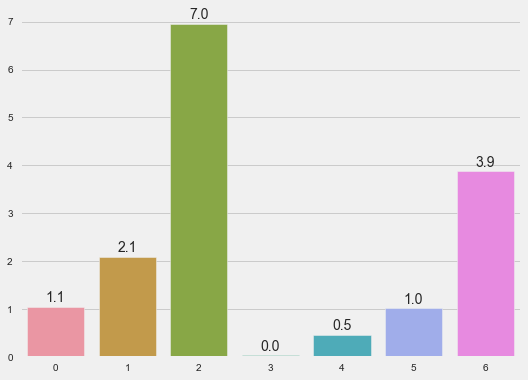

In [31]:
def getTargetPercentageByCluster(data,targetName : str) -> dict:
    clusterIdName="ClusterID"
    targetByCluster=dict()
    nSamples=data.shape[0]
    percentagesByCluster=(data.groupby(clusterIdName).size().reset_index().iloc[:,1]/nSamples)*100
    print("Representation percentages by cluster : \n{}".format(percentagesByCluster))
    for clusterId in data[clusterIdName].unique():
        purchasePercentage=((data[(data[targetName] == 1) & (data[clusterIdName] == clusterId)].shape[0])/nSamples)*100
        targetByCluster[clusterId]=round(purchasePercentage,2)

    return targetByCluster


def plotTargetPercentageByCluster(targetPercentagesByCluster : dict):
    plt.figure(figsize=(8, 6))
    sbarplot=sns.barplot(x=list(targetPercentagesByCluster.keys()),y=list(targetPercentagesByCluster.values()))
    for p in sbarplot.patches:
        sbarplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 
plt.xlabel("Cluster id", size=14)
plt.ylabel("Target percentage", size=14)  
plt.close()

targetPercentagesByCluster=getTargetPercentageByCluster(onlineShoppersClusteringDf,'Revenue')
plotTargetPercentageByCluster(targetPercentagesByCluster)

The cluster with higher Revenue are the 1,2 and 6.
Good for us the in the cluster 2 there are the 54% of the data,so the 7% of the revenue is located in the 54% of customers

In [32]:
onlineShoppersClusteringDf.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue,ClusterID
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,1,1,1,1,0,0,0,1,0,3
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,0.0,0.0,...,2,2,1,2,0,0,0,1,0,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,4,1,9,3,0,0,0,1,0,3
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,0.0,0.0,...,3,2,2,4,0,0,0,1,0,2
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,0.0,0.0,...,3,3,1,4,1,0,0,1,0,2
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757,-0.132035,-0.380935,0.0,0.0,...,2,2,1,3,0,0,0,1,0,2


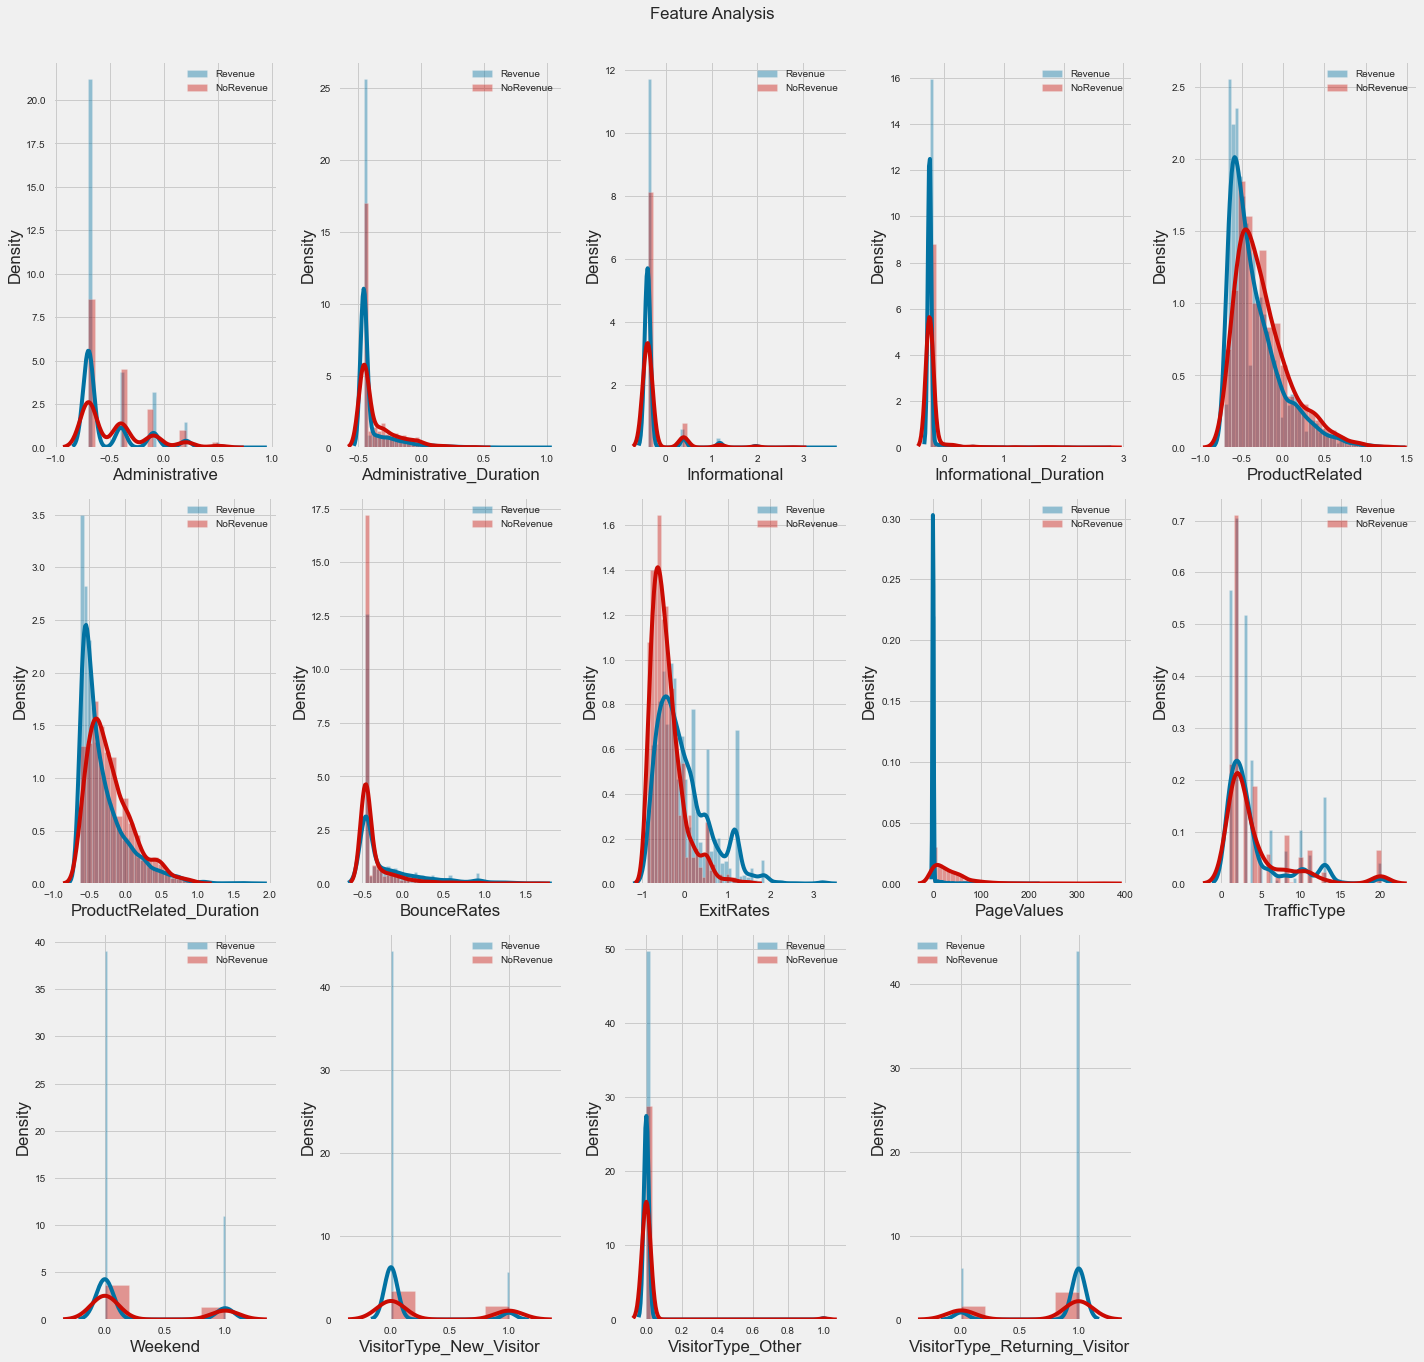

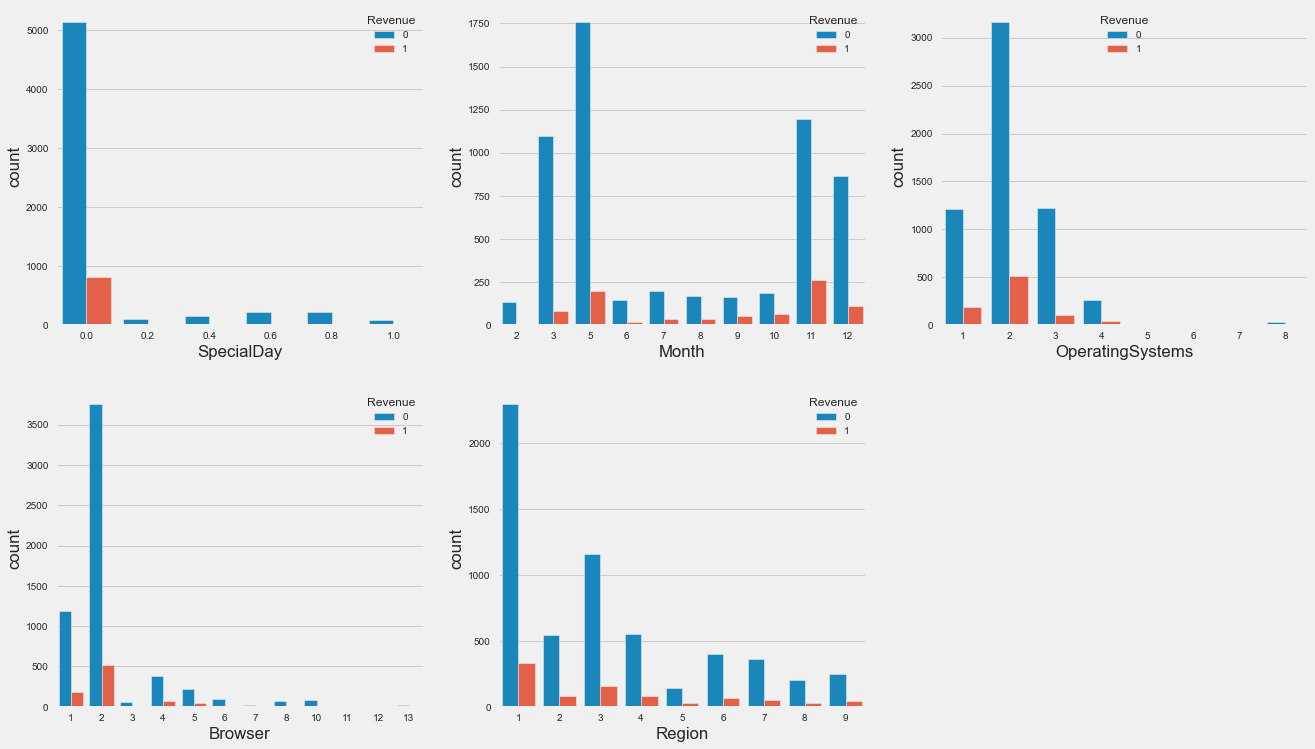

In [33]:
import warnings
warnings.filterwarnings('ignore')
discreteColumns=['SpecialDay','Month','OperatingSystems','Browser','Region']
result = onlineShoppersClusteringDf.loc[onlineShoppersClusteringDf['ClusterID'] == 2]


fig = plt.figure(figsize = (20, 25))
j = 0

columnsToPlot=result.columns.to_list()
columnsToPlot = [ elem for elem in columnsToPlot if elem not in discreteColumns]
columnsToPlot.remove(TARGET_NAME)
columnsToPlot.remove('ClusterID')
for item in columnsToPlot:
    plt.subplot(4, 5, j+1)
    j += 1
    sns.distplot(result[item][result[TARGET_NAME]==0], color='b', label = TARGET_NAME)
    sns.distplot(result[item][result[TARGET_NAME]==1], color='r', label = 'No'+TARGET_NAME)
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

fig = plt.figure(figsize = (20, 12))
t=0
for feature in discreteColumns:
    plt.subplot(2, 3, t+1)
    t += 1
    sns.countplot(x=feature, hue=TARGET_NAME, data=result)


### Final insights of clustering

The most clearly differences,features based, between a revenue interaction and other that not are the follow:

<li>Product related : Low values are too much better for a final revenue visit</li>
<li>Product related duration : Lower values better</li>
<li>Weekend: Seems like the most of revenus its from week days </li>
<li>New Visitor and Returnig visitor : Not new visitors and thats customers that return to the web are clearly the most valuable, so customer attention and fidelity rewards are a most</li>


## Task 3 - Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier

In [34]:
from sklearn.semi_supervised import LabelSpreading

In [35]:
#Reasign the target

semiSupervisedDf=onlineShoppersDf.copy()
semiSupervisedDf["Revenue"]=y
semiSupervisedDf.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,0,0,0,1,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,0,0,0,1,0


## Build the datasets
 <li>Training data is from June to Sept</li>
 <li>Records from October to December remove target attribute(Revenue)</li>

In [36]:
labeledData=semiSupervisedDf[semiSupervisedDf['Month'].isin([6,7,8,9])]
unlabeledData=semiSupervisedDf[semiSupervisedDf['Month'].isin([10,11,12])]
test_y=unlabeledData["Revenue"]

#Miss label the data
unlabeledData=unlabeledData.drop("Revenue",axis=1)
unlabeledData["Revenue"] = -1
unlabeledData.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
5455,0,0.0,0,0.0,1,207.570248,0.0,0.007937,0.000000,0.0,10,2,2,1,5,0,0,0,1,-1
5457,1,63.4,0,0.0,3,120.400000,0.0,0.000000,42.293068,0.0,10,1,1,3,3,0,1,0,0,-1
5461,7,56.3,0,0.0,15,315.400000,0.0,0.011111,0.000000,0.0,10,2,2,1,2,0,1,0,0,-1
5463,1,39.2,2,120.8,7,80.500000,0.0,0.010000,0.000000,0.0,11,3,2,4,2,1,1,0,0,-1
5464,3,89.6,0,0.0,57,1721.906667,0.0,0.005932,204.007949,0.0,11,2,2,1,4,1,0,0,1,-1


In [37]:
print("Labeled data shape : {}".format(labeledData.shape))
print("Unlabeled data shape : {}".format(test_y.shape))

Labeled data shape : (1601, 20)
Unlabeled data shape : (5274,)


Join both datasets and extract the label

In [38]:
train_y=pd.concat([labeledData[TARGET_NAME],unlabeledData[TARGET_NAME]], axis=0, join="inner")
trainX=pd.concat([labeledData,unlabeledData], axis=0, join="inner").drop(TARGET_NAME,axis=1)

Find the best number of neightbors

In [39]:
n_neighbors=[2,3,5,7,9,11]

def findBestNeightBor(data,labels,n):
  SIGNIFICANT_DECIMAL=5

  bestRecall=-1
  bestNeightbors=n[0]
  for neighbor in n_neighbors: 
    lblSpreadingModel=LabelSpreading(alpha=0.05,n_neighbors=neighbor,kernel='knn')
    lblSpreadingModel.fit(data, labels)
    labelsPredicted=lblSpreadingModel.predict(data)
    reLabeledValues=lblSpreadingModel.transduction_
    currentlyRecall=recall(reLabeledValues, labelsPredicted,average='weighted')
    print("For n_neighbors : {} the recall is {} and the last was {}".format(neighbor,np.round(currentlyRecall,SIGNIFICANT_DECIMAL),np.round(bestRecall,SIGNIFICANT_DECIMAL)))
    if  np.round(currentlyRecall,SIGNIFICANT_DECIMAL) > np.round(bestRecall,SIGNIFICANT_DECIMAL):
      bestRecall=currentlyRecall
      bestNeightbors=neighbor
  return bestRecall,bestNeightbors

best_recall_score,bestNeighbors=findBestNeightBor(trainX,train_y,n_neighbors)
### END CODE HERE ###
print(f"best_recall: {best_recall_score:.4f}, best n_neighbors: {bestNeighbors}")

For n_neighbors : 2 the recall is 0.98647 and the last was -1
For n_neighbors : 3 the recall is 0.98545 and the last was 0.98647
For n_neighbors : 5 the recall is 0.96087 and the last was 0.98647
For n_neighbors : 7 the recall is 0.94822 and the last was 0.98647
For n_neighbors : 9 the recall is 0.94051 and the last was 0.98647
For n_neighbors : 11 the recall is 0.93905 and the last was 0.98647
best_recall: 0.9865, best n_neighbors: 2


Fit the final model 

In [40]:
lblSpreadingModelFinal=LabelSpreading(alpha=0.01,n_neighbors=bestNeighbors,kernel='knn')
lblSpreadingModelFinal.fit(trainX, train_y)

#Predict the labels and get it
labelsTransduction=lblSpreadingModelFinal.transduction_

Accuracy = 0.7874478574137277, Precision = 0.7263812690707456, Recall = 0.7874478574137277, F1-score = 0.7271101950992611


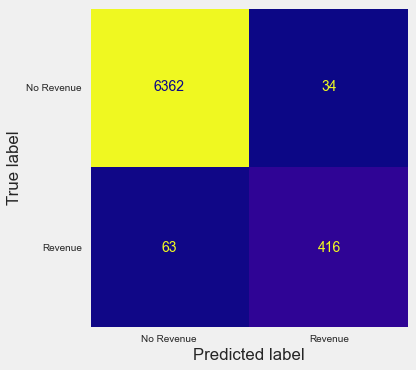

In [41]:
misslabeledTransduction=labelsTransduction[labeledData.shape[0]:]

acc  = accuracy(test_y, misslabeledTransduction)
rec  = recall(test_y, misslabeledTransduction,average='weighted')
prec = precision(test_y, misslabeledTransduction,average='weighted')
f1   = f1_score(test_y, misslabeledTransduction,average='weighted')
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

plot_confusion_matrix(lblSpreadingModelFinal,trainX,labelsTransduction, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)

## Label spreading trained with self labeled examples

Now,we predict the labels for test dataset with de data from February to March

In [42]:
#Prepare test data
testData=semiSupervisedDf[semiSupervisedDf['Month'].isin([2,3])]
trueLabelstestData=testData.pop("Revenue")

testData.head(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1


In [43]:
#Predict the labels
testDataPredictions=lblSpreadingModelFinal.predict(testData)

Accuracy = 0.8971783835485414, Precision = 0.8767758973836888, Recall = 0.8971783835485414, F1-score = 0.8843802308607615


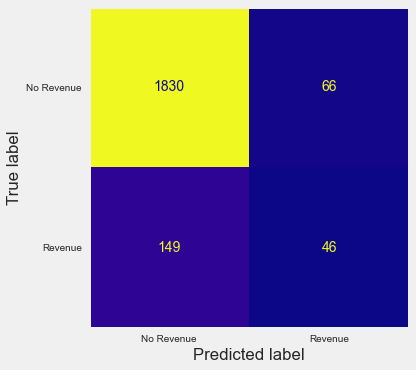

In [44]:
acc  = accuracy(trueLabelstestData, testDataPredictions)
rec  = recall(trueLabelstestData, testDataPredictions,average='weighted')
prec = precision(trueLabelstestData, testDataPredictions,average='weighted')
f1   = f1_score(trueLabelstestData, testDataPredictions,average='weighted')
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

plot_confusion_matrix(lblSpreadingModelFinal,testData,trueLabelstestData, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)

## Label Spreading having every example labeled in training time

In [50]:
originalLabeledData=semiSupervisedDf.copy()
y=originalLabeledData.pop("Revenue")


lblSpreadingOriDataModel=LabelSpreading(alpha=0.05,n_neighbors=bestNeighbors,kernel='knn')
lblSpreadingOriDataModel.fit(originalLabeledData, y)

LabelSpreading(alpha=0.05, kernel='knn', n_neighbors=2)

Accuracy = 0.9368723098995696, Precision = 0.9303776451552636, Recall = 0.9368723098995696, F1-score = 0.9288917711613832


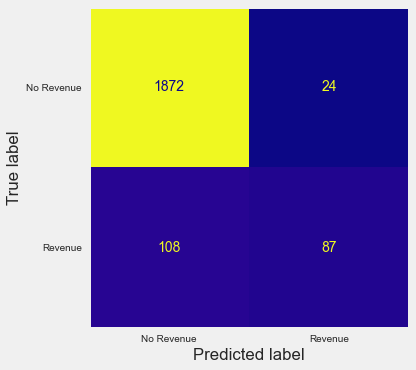

In [51]:
testDataPredictions=lblSpreadingOriDataModel.predict(testData)

acc  = accuracy(trueLabelstestData, testDataPredictions)
rec  = recall(trueLabelstestData, testDataPredictions,average='weighted')
prec = precision(trueLabelstestData, testDataPredictions,average='weighted')
f1   = f1_score(trueLabelstestData, testDataPredictions,average='weighted')
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

plot_confusion_matrix(lblSpreadingOriDataModel,testData,trueLabelstestData, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)


|Method    |   Recall      |F1-score    | Accuracy    |
|----------|---------------|------------|-------------|
| Random forest |1.0                 |0.787878787878788                  |0.9497847919655668                    |
| Label Spreading trained with self labeled data| 0.8971783835485414                |   0.8843802308607615               |   0.8971783835485414             |
| Label Spreading trained with the whole dataset labeled|0.9368723098995696|0.9288917711613832 |0.9368723098995696|

<font size="3">Label Spreading with the whole data labeled its the winner,at least for our test data from February and March,<p>The next step should be try to apply this classifier for our initial data split</p></font>

